In [466]:
# Step 1: Understand the dataset
# import pandas module
import pandas as pd
# creating a data frame
df = pd.read_csv("HW1 clv_transactions.csv")
df.head()
df.shape

(4186, 4)

In [467]:
# Step 1:
# 1) Check Missing Values
print (df.isnull().values.any())
print("There aren't any missing values")

False
There aren't any missing values


In [468]:
# Step 1:
# 2) Range of Date in Dataset
df['TransactionDate'] = pd.to_datetime(df['TransactionDate']) # If your Date column is of the type object otherwise skip this
date_range = str(df['TransactionDate'].dt.date.min()) + ' to ' +str(df['TransactionDate'].dt.date.max())
print("Range of Date in Dataset is from",date_range)

Range of Date in Dataset is from 2010-01-04 to 2015-12-31


In [469]:
# Step 1:
# 3) Range of Date in Dataset
n = df.CustomerID.nunique()
print("No.of.unique values in height column :",n)

No.of.unique values in height column : 1000


In [470]:
# Step 1:
# 4) Statistics for the amount
column = df["Amount"]
max_value = column.max()
# Get Minimum Amount
print("Maximum Amount :",max_value)
min_value = column.min()
# Get Maximum Amount
print("Minimum Amount :",min_value)
# Variance
variance = column.var()
print("Variance :", variance)
# Standard Deviation
sd = column.std()
print("Standard Deviation :", sd)

Maximum Amount : 2033.0
Minimum Amount : -1.0
Variance : 1499.5411107517461
Standard Deviation : 38.72390877418945


No significant increase in Transaction amounts over time.


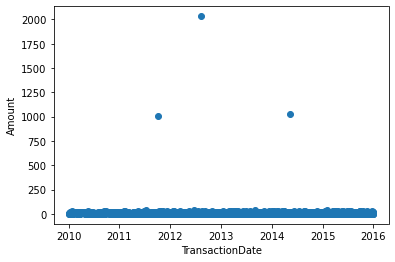

In [471]:
# Step 1:
# 5) Transaction amounts over time
import matplotlib.pyplot as plt
plt.scatter(df['TransactionDate'], df['Amount'])
plt.xlabel("TransactionDate")
plt.ylabel("Amount")
#df.plot.scatter(x='TransactionDate', y='Amount', s=10, c='purple')
# Plot can help us see the Amount over TransactionDate
print("No significant increase in Transaction amounts over time.")


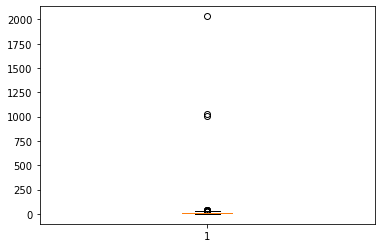

<Figure size 1080x576 with 0 Axes>

It can be seen from boxplot that there are 3 outliers


In [472]:
# Step 2:
# 1) Find outliners 
import numpy as np
np_Amt= df['Amount'].to_numpy(np.float64)
plt.boxplot(np_Amt)
fig = plt.figure(figsize =(15, 8))
plt.show()
print("It can be seen from boxplot that there are 3 outliers")

In [473]:
# Step 2:
# 2) Treating Outliers
# Using 3 standard deviation method to remove outliers 
# Here data is kind of normally distributed as much variation is not found excpet 3 extreme points
# Removing outliers by considering any data points that are beyond 3 standard deviation from mean. 
# Retained negative values as only 2 rows found and are insignficant as fall under less than 0.1% of data.
upper_limit = df.Amount.mean() + 3*df.Amount.std()
lower_limit = df.Amount.mean() - 3*df.Amount.std()

In [474]:
# Step 2:
# Displaying the outliers
df[(df.Amount>upper_limit) | (df.Amount<lower_limit)]

,TransactionID,TransactionDate,CustomerID,Amount
23,24,2011-10-07,7,1003.0
211,212,2014-05-14,54,1027.0
4177,4178,2012-08-13,1000,2033.0


In [475]:
# Step 2:
# 2) Removing outliers
df_no_outliers = df[(df.Amount<upper_limit) & (df.Amount>lower_limit)].copy()
df_no_outliers.shape
df_no_outliers.head()

,TransactionID,TransactionDate,CustomerID,Amount
0,1,2012-09-04,1,20.26
1,2,2012-05-15,2,10.87
2,3,2014-05-23,2,2.21
3,4,2014-10-24,2,10.48
4,5,2012-10-13,2,3.94


In [476]:
# Step 3:
# Extracting Transaction Year
df_no_outliers['TransactionDate'] = pd.to_datetime(df_no_outliers['TransactionDate'])
df_no_outliers['TransactionYear'] = df_no_outliers['TransactionDate'].dt.year
df_no_outliers.head()

,TransactionID,TransactionDate,CustomerID,Amount,TransactionYear
0,1,2012-09-04,1,20.26,2012
1,2,2012-05-15,2,10.87,2012
2,3,2014-05-23,2,2.21,2014
3,4,2014-10-24,2,10.48,2014
4,5,2012-10-13,2,3.94,2012


In [477]:
# Step 3:
# Extracting OriginYear
min_year = df_no_outliers.groupby(['CustomerID'])['TransactionYear'].min()
df_no_outliers['OriginYear'] = df_no_outliers.apply(lambda row: min_year.loc[row['CustomerID']], axis=1)
df_no_outliers.head()

,TransactionID,TransactionDate,CustomerID,Amount,TransactionYear,OriginYear
0,1,2012-09-04,1,20.26,2012,2012
1,2,2012-05-15,2,10.87,2012,2012
2,3,2014-05-23,2,2.21,2014,2012
3,4,2014-10-24,2,10.48,2014,2012
4,5,2012-10-13,2,3.94,2012,2012


In [478]:
# Step 3:
# Calculating customer age 
df_no_outliers['Age']= (df_no_outliers['TransactionYear'] - df_no_outliers['OriginYear']+1)*12
df_no_outliers['OriginYear']= df_no_outliers['OriginYear'].astype(str) + '-01-01 - ' +  df_no_outliers['OriginYear'].astype(str) +'-12-31'
df_no_outliers

,TransactionID,TransactionDate,CustomerID,Amount,TransactionYear,OriginYear,Age
0,1,2012-09-04,1,20.26,2012,2012-01-01 - 2012-12-31,12
1,2,2012-05-15,2,10.87,2012,2012-01-01 - 2012-12-31,12
2,3,2014-05-23,2,2.21,2014,2012-01-01 - 2012-12-31,36
3,4,2014-10-24,2,10.48,2014,2012-01-01 - 2012-12-31,36
4,5,2012-10-13,2,3.94,2012,2012-01-01 - 2012-12-31,12
...,...,...,...,...,...,...,...
4181,4182,2013-06-23,1000,3.86,2013,2010-01-01 - 2010-12-31,48
4182,4183,2011-08-07,1000,4.00,2011,2010-01-01 - 2010-12-31,24
4183,4184,2012-10-07,1000,18.37,2012,2010-01-01 - 2010-12-31,36
4184,4185,2014-01-09,1000,3.45,2014,2010-01-01 - 2010-12-31,60


In [479]:
# Step 4: Calculate cumulative transaction amounts
# Cumulative Transactions
cmltv_amount = pd.pivot_table(df_no_outliers, columns=['Age'], 
                                index=['OriginYear'], 
                                aggfunc={'Amount':np.sum}
                                ).cumsum(axis=1).reset_index().droplevel(0, axis=1)
cmltv_amount  = cmltv_amount.set_index([''])
cmltv_amount.columns = cmltv_amount.columns.rename('OriginYear')
cmltv_amount.name = 'Amount.cmltv'
print (cmltv_amount.name)
cmltv_amount 

Amount.cmltv


OriginYear,12,24,36,48,60,72
,,,,,,
2010-01-01 - 2010-12-31,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
2011-01-01 - 2011-12-31,2238.46,3756.90,5464.99,6702.11,7861.24,NaN
2012-01-01 - 2012-12-31,2181.35,3874.69,5226.86,6501.85,NaN,NaN
2013-01-01 - 2013-12-31,2179.85,3608.81,5226.75,NaN,NaN,NaN
2014-01-01 - 2014-12-31,1830.85,3262.05,NaN,NaN,NaN,NaN
2015-01-01 - 2015-12-31,1912.17,NaN,NaN,NaN,NaN,NaN


In [480]:
# Step 5:
# Finding Cumulative age of Customers
customer_age = pd.pivot_table(df_no_outliers, values='CustomerID', index='OriginYear', 
                          aggfunc=pd.Series.nunique).rename(columns={'CustomerID':'Count'})
customer_age

,Count
OriginYear,
2010-01-01 - 2010-12-31,172
2011-01-01 - 2011-12-31,170
2012-01-01 - 2012-12-31,163
2013-01-01 - 2013-12-31,180
2014-01-01 - 2014-12-31,155
2015-01-01 - 2015-12-31,160


In [481]:
# Step 5: 
# Merging age of Customers with df_no_outliers dataframe
df_updated = customer_age.merge(df_no_outliers, on='OriginYear', how='left')
df_updated

,OriginYear,Count,TransactionID,TransactionDate,CustomerID,Amount,TransactionYear,Age
0,2010-01-01 - 2010-12-31,172,29,2010-02-04,9,0.74,2010,12
1,2010-01-01 - 2010-12-31,172,30,2014-05-23,9,11.87,2014,60
2,2010-01-01 - 2010-12-31,172,31,2010-12-06,9,15.50,2010,12
3,2010-01-01 - 2010-12-31,172,32,2011-09-14,9,11.46,2011,24
4,2010-01-01 - 2010-12-31,172,33,2014-07-12,9,7.99,2014,60
...,...,...,...,...,...,...,...,...
4178,2015-01-01 - 2015-12-31,160,3887,2015-10-11,941,1.52,2015,12
4179,2015-01-01 - 2015-12-31,160,3945,2015-11-21,954,11.18,2015,12
4180,2015-01-01 - 2015-12-31,160,3988,2015-03-12,960,10.47,2015,12
4181,2015-01-01 - 2015-12-31,160,3989,2015-08-07,960,7.49,2015,12


In [482]:
# Step 5: Cumulative New Customers Count over the months
# New Customers Pivot Table
cmltv_newcustomers =  pd.pivot_table(df_updated, columns=['Age'], 
                                index=['OriginYear'], 
                                values=['Count']
                                ).reset_index().droplevel(0, axis=1)
cmltv_newcustomers = cmltv_newcustomers.set_index([''])
cmltv_newcustomers.columns = cmltv_newcustomers.columns.rename('OriginYear')
cmltv_newcustomers.name = 'NewCustomers.cmltv'
print (cmltv_newcustomers.name)
cmltv_newcustomers

NewCustomers.cmltv


OriginYear,12,24,36,48,60,72
,,,,,,
2010-01-01 - 2010-12-31,172.0,172.0,172.0,172.0,172.0,172.0
2011-01-01 - 2011-12-31,170.0,170.0,170.0,170.0,170.0,NaN
2012-01-01 - 2012-12-31,163.0,163.0,163.0,163.0,NaN,NaN
2013-01-01 - 2013-12-31,180.0,180.0,180.0,NaN,NaN,NaN
2014-01-01 - 2014-12-31,155.0,155.0,NaN,NaN,NaN,NaN
2015-01-01 - 2015-12-31,160.0,NaN,NaN,NaN,NaN,NaN


In [483]:
# Step 6:
# Historic CLV
HistoricCLV=cmltv_amount/cmltv_newcustomers
HistoricCLV

OriginYear,12,24,36,48,60,72
,,,,,,
2010-01-01 - 2010-12-31,13.137616,21.016163,30.667500,38.560291,46.108663,52.119128
2011-01-01 - 2011-12-31,13.167412,22.099412,32.147000,39.424176,46.242588,NaN
2012-01-01 - 2012-12-31,13.382515,23.771104,32.066626,39.888650,NaN,NaN
2013-01-01 - 2013-12-31,12.110278,20.048944,29.037500,NaN,NaN,NaN
2014-01-01 - 2014-12-31,11.811935,21.045484,NaN,NaN,NaN,NaN
2015-01-01 - 2015-12-31,11.951062,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'HistoricCLV'}, xlabel='Age', ylabel='HistoricCLV'>

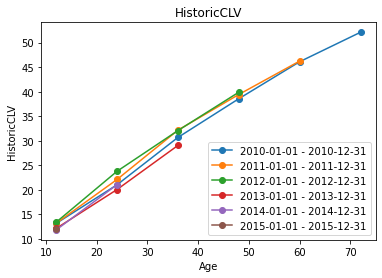

In [484]:
# Step 6:
# Historic CLV Plot
ax = HistoricCLV.transpose().plot(marker='o', xlabel='Age', ylabel='HistoricCLV', title='HistoricCLV')
ax

In [485]:
# Step 6: Volume-weighted average of the Historic CLV for each Age group, weighted by the number of customers in each group
# Volume Weighted Average
df_weighted=pd.DataFrame((HistoricCLV * pivot2).sum()/pivot2.sum()).rename(columns = {0:'HistoricCLV'}).reset_index()
df_weighted = df_weighted.rename(columns = {'OriginYear':'Age'})
df_weighted 

,Age,HistoricCLV
0,12,12.602350
1,24,21.568131
2,36,30.939285
3,48,39.279861
4,60,46.175234
5,72,52.119128


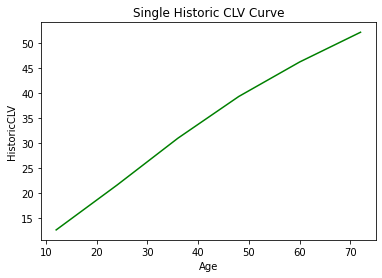

In [486]:
# Step 6: 
# Single Historic CLV GPlot
import matplotlib.pyplot as plt 
plt.plot(df_weighted['Age'], df_weighted['HistoricCLV'], color='green') 
plt.xlabel('Age') 
plt.ylabel('HistoricCLV') 
  # displaying the title
plt.title("Single Historic CLV Curve")
plt.show() 

In [487]:
# Step 7: 
# Q.1) How much have customers acquired in 2011 spent to date? : 
# Ans: Approximately : 46.2$ 

# Q.2) Do each group of customers exhibit similar or different patterns of spending? What’s the implication for the business?
# Ans:
# Each group of customers exhibits different patterns of spending.
# Oldest customers generally spend more as they either trust/satisfied with the company/product/service.
# Compared to old customers new customers don't spend much.
# This implies more profit is received from old customers.